# Introduction to Data Science (Intern Level)

**File:** `01_intro_to_data_science.ipynb` — a compact, runnable notebook introducing core DS concepts, lifecycle, roles, ethics, and a short hands-on demo.

**How to use:** Run cells top-to-bottom. The notebook uses small toy datasets and common libraries.


---
## 0) Setup: install / import and reproducibility
Run this cell first. It will try to import libraries and pip-install any missing ones.

In [1]:
# Setup: install imports and seed
import sys
from importlib import util
def ensure(pkg):
    if util.find_spec(pkg) is None:
        print(f'Installing {pkg}...')
        import subprocess
        subprocess.check_call([sys.executable, '-m', 'pip', 'install', pkg])

# Keep dependencies minimal and common
for p in ('numpy','pandas','matplotlib','seaborn','scikit-learn'):
    ensure(p)

# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# plotting defaults and reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
plt.rcParams.update({'figure.figsize': (6,4), 'font.size': 10})
sns.set()
print('Setup complete — ready to run the notebook (seed=', RANDOM_SEED, ')')


Installing matplotlib...
Installing seaborn...
Installing scikit-learn...
Setup complete — ready to run the notebook (seed= 42 )


---
## A) What is Data Science?

**Definition (short):** Data Science is the process of extracting insights and building data-driven products from data using statistics, engineering, and domain knowledge.

**Example applications:** recommendation systems, fraud detection, demand forecasting, medical diagnosis, and customer segmentation.

**Typical workflow outcomes:** descriptive reports, predictive models, visualizations, dashboards, or automated ML services.

*References:* CRISP-DM framework (industry classic) — https://en.wikipedia.org/wiki/CRISP-DM


---
## B) Data Science Lifecycle (CRISP-DM style)

Below we list main phases. For each: purpose, key questions, artifacts, pitfalls.


### 1) Business / Problem Understanding
**Purpose:** define goals and success metrics.
**Key questions:** What problem are we solving? Who are stakeholders? What is success (KPIs)?
**Artifacts:** project brief, success metric, constraints, timeline.
**Common pitfalls:** vague objectives, moving targets, ignoring feasibility.


### 2) Data Understanding
**Purpose:** collect and explore data to assess suitability.
**Key questions:** What data exists? Is it complete? Biased? Timely?
**Artifacts:** data samples, EDA plots, data dictionary.
**Common pitfalls:** small samples, hidden biases, poor documentation.


### 3) Data Preparation
**Purpose:** clean, normalize, feature-engineer, and split data.
**Key questions:** How to handle missing values? Which features to create or drop?
**Artifacts:** cleaned dataset, feature definitions, pipelines.
**Common pitfalls:** leakage, overfitting via leakage, inconsistent transformations.


### 4) Modeling
**Purpose:** train models to predict or extract patterns.
**Key questions:** Which algorithm suits the problem? How to tune hyperparameters?
**Artifacts:** trained model, hyperparameter logs.
**Common pitfalls:** overfitting, ignoring baseline models, poor cross-validation.


### 5) Evaluation
**Purpose:** measure performance against business metrics using appropriate data.
**Key questions:** Are metrics aligned with business goals? Are results statistically significant?
**Artifacts:** evaluation report, confusion matrices, error analysis.
**Common pitfalls:** wrong metrics, test data leakage, ignoring slices where model fails.


### 6) Deployment & Monitoring
**Purpose:** put models into production and keep them healthy.
**Key questions:** How to serve the model? How to monitor data drift and performance?
**Artifacts:** serving API, monitoring dashboard, retraining plan.
**Common pitfalls:** lack of monitoring, brittle pipelines, no rollback plan.


---
## C) Roles in Data Teams
A short mapping of common roles and typical handoffs.


**Data Scientist** — builds models, experiments, and communicates results. Tools: Python, scikit-learn, pandas, Jupyter.
**Data Analyst** — explores data, creates dashboards, performs reporting. Tools: SQL, Excel, Tableau, pandas.
**Data Engineer** — builds data pipelines, ETL/ELT, ensures data quality. Tools: SQL, Airflow, Spark, Kafka.
**ML Engineer** — productionizes models, serves and monitors them. Tools: Docker, Kubernetes, TF/ONNX, CI/CD.
**Product Manager / Domain Expert** — defines business needs, interprets results, prioritizes features.


---
## D) Ethics & Bias (foundations)

**Common bias types:**
- Sampling bias: training data isn't representative.
- Label bias: labels reflect historical or subjective decisions.
- Measurement bias: instruments or sensors introduce errors.
- Historical bias: past unfair patterns embedded in data.

**Principles:** fairness, privacy, transparency, and accountability.
**Mitigation strategies (brief):** data auditing, collecting more diverse data, careful feature selection, fairness-aware metrics, differential privacy and access controls, documentation (datasheets/model cards).

Further reading:
- Model Cards: https://arxiv.org/abs/1810.03993
- Datasheets for Datasets: https://arxiv.org/abs/1803.09010


---
## Mini Demo — classic small dataset (Iris)
We'll load sklearn's iris dataset, perform quick EDA, train a simple logistic regression, and evaluate it. Keep code commented and concise.

In [4]:
from sklearn import datasets
iris = datasets.load_iris(as_frame=True)
X = iris.frame.drop(columns=['target'])
y = iris.frame['target']
print('Dataset shape:', X.shape)
print('Columns:', list(X.columns))
print('Sample:')
X.head()


Dataset shape: (150, 4)
Columns: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Quick exploratory data analysis (EDA)
Show summary statistics, check for nulls, and a couple of simple plots.

In [6]:
# Summary statistics & null checks
display(X.describe())
print('Nulls per column:')
print(X.isnull().sum())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Nulls per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


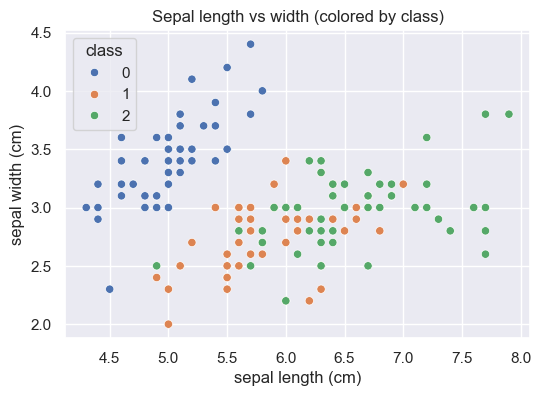

In [7]:
# Visualization 1: scatter of two features colored by class
plt.figure()
sns.scatterplot(data=iris.frame, x='sepal length (cm)', y='sepal width (cm)', hue='target', palette='deep')
plt.title('Sepal length vs width (colored by class)')
plt.legend(title='class')
plt.show()


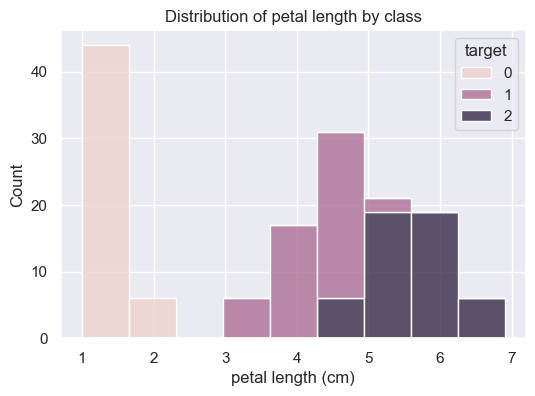

In [8]:
# Visualization 2: histogram of petal length
plt.figure()
sns.histplot(iris.frame, x='petal length (cm)', hue='target', multiple='stack')
plt.title('Distribution of petal length by class')
plt.show()


### Baseline model: Logistic Regression (simple)
We'll train a quick model using a train/test split and report accuracy + classification report.

In [9]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

# Fit a baseline logistic regression
model = LogisticRegression(max_iter=200, random_state=RANDOM_SEED)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy (test): {acc:.3f}')
print('Classification report:')
print(classification_report(y_test, y_pred, digits=3))


Train shape: (120, 4) Test shape: (30, 4)
Accuracy (test): 0.967
Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     0.900     0.947        10
           2      0.909     1.000     0.952        10

    accuracy                          0.967        30
   macro avg      0.970     0.967     0.967        30
weighted avg      0.970     0.967     0.967        30



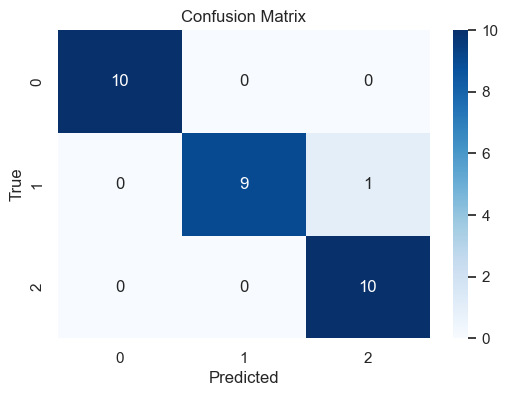

In [10]:
# Confusion matrix visualization to inspect errors
cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


### Short reflection on limitations & potential biases
- Iris is tiny and clean — real data is messier.
- Classes are well-separated; metrics will be optimistic compared to noisy real tasks.
- Potential biases: dataset may not represent real-world population (sampling bias), labels come from old taxonomy (label bias).
- For production: consider cross-validation, calibration, feature tracking, and monitoring for data drift.


---
## Exercises (for the intern)
Try these small tasks. Solutions appear in the next section.

1. **Add a new plot:** create a pairplot of two features (e.g., petal length vs petal width) colored by class.
2. **Feature idea:** add a simple derived feature `petal_area = petal length * petal width` and train the model again — does accuracy change?
3. **Different metric:** compute macro F1-score instead of accuracy. Does it change model ranking?
4. **Bias identification:** suggest one potential source of bias in the iris demo and one concrete mitigation step.


---
## Solutions (answers)
Below are short solutions — run them to verify results.

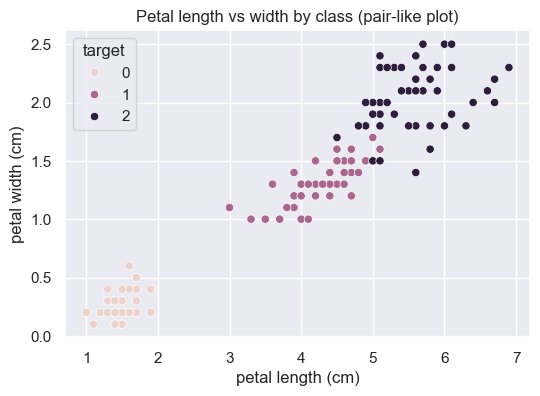

Accuracy with petal_area: 0.9666666666666667
Macro F1 (baseline): 0.9665831244778612
Macro F1 (with petal_area): 0.9665831244778612
Bias example: sampling bias — iris dataset contains specific species measured in a controlled setting, not a global distribution. Mitigation: collect more diverse samples or validate on field data.


In [11]:
# Solution 1: pairplot (petal features)
plt.figure()
sns.scatterplot(data=iris.frame, x='petal length (cm)', y='petal width (cm)', hue='target')
plt.title('Petal length vs width by class (pair-like plot)')
plt.show()

# Solution 2: add petal_area and retrain
X2 = X.copy()
X2['petal_area'] = X2['petal length (cm)'] * X2['petal width (cm)']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y)
model2 = LogisticRegression(max_iter=200, random_state=RANDOM_SEED)
model2.fit(X2_train, y2_train)
print('Accuracy with petal_area:', accuracy_score(y2_test, model2.predict(X2_test)))

# Solution 3: compute macro F1
from sklearn.metrics import f1_score
print('Macro F1 (baseline):', f1_score(y_test, y_pred, average='macro'))
print('Macro F1 (with petal_area):', f1_score(y2_test, model2.predict(X2_test), average='macro'))

# Solution 4: bias identification (example)
print('Bias example: sampling bias — iris dataset contains specific species measured in a controlled setting, not a global distribution. Mitigation: collect more diverse samples or validate on field data.')


---
## Key Takeaways
- Data Science combines domain knowledge, statistics, and engineering to produce data-driven outcomes.
- The lifecycle (CRISP-DM) helps structure projects from business goals to monitoring.
- Teams contain complementary roles (DS, DE, ML Eng, Analysts, PMs).
- Ethics and bias should be considered at every phase.
- Start with simple baselines, iterate, and document assumptions.


## Next steps / reading (short list)
- CRISP-DM overview: https://en.wikipedia.org/wiki/CRISP-DM
- scikit-learn tutorials: https://scikit-learn.org/stable/tutorial/index.html
- Model Cards & Datasheets research (ethics): see links above.


---
## README.md (copy into separate README.md file)
```
01_intro_to_data_science.ipynb — A compact intern-level notebook introducing core DS topics.
Requirements: Python 3.10+, pandas, numpy, matplotlib, seaborn, scikit-learn.

Run: `jupyter notebook` and open `01_intro_to_data_science.ipynb`. The top cell will install missing packages automatically.

Notes: keep outputs stripped before committing (use nbstripout).
```